<a href="https://colab.research.google.com/github/jjiiiwooo/ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [4]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [5]:

model.add(keras.layers.MaxPooling2D(2))

In [6]:

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

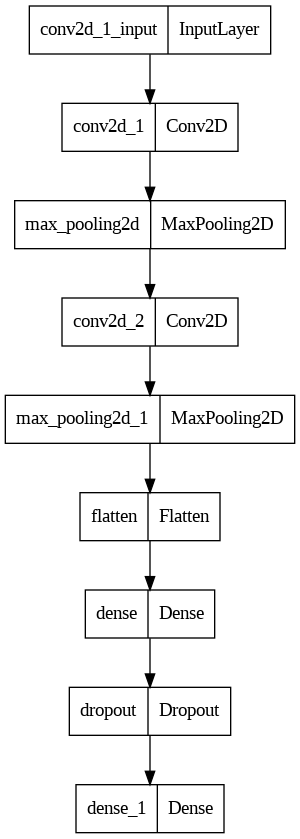

In [8]:

keras.utils.plot_model(model)

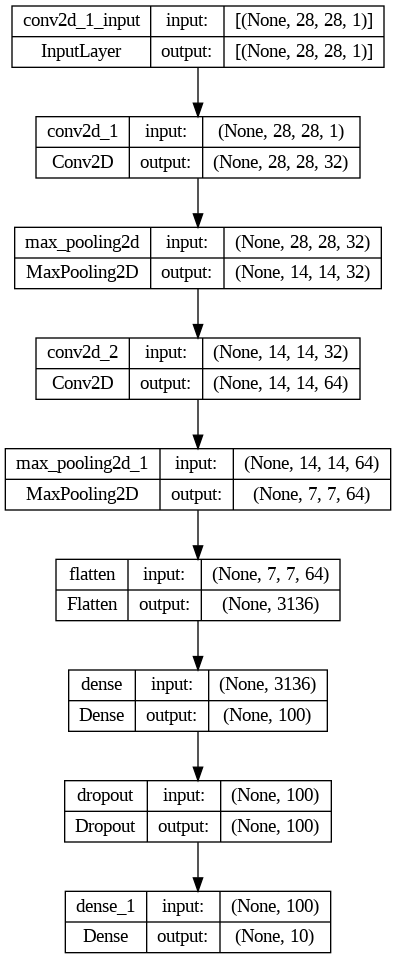

In [9]:

keras.utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 74s 48ms/step - loss: 0.5135 - accuracy: 0.8154 - val_loss: 0.3248 - val_accuracy: 0.8798
Epoch 2/20
   3/1500 [..............................] - ETA: 56s - loss: 0.3358 - accuracy: 0.8542 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 69s 46ms/step - loss: 0.3363 - accuracy: 0.8786 - val_loss: 0.2692 - val_accuracy: 0.9002
Epoch 3/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2906 - accuracy: 0.8960 - val_loss: 0.2472 - val_accuracy: 0.9099
Epoch 4/20
1500/1500 [==============================] - 73s 48ms/step - loss: 0.2595 - accuracy: 0.9061 - val_loss: 0.2354 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2338 - accuracy: 0.9135 - val_loss: 0.2336 - val_accuracy: 0.9168
Epoch 6/20
1500/1500 [==============================] - 74s 50ms/step - loss: 0.2159 - accuracy: 0.9207 - val_loss: 0.2213 - val_accuracy: 0.9203
Epoch 7/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.1996 - accuracy: 0.9254 - val_loss: 0.2161 - val_accuracy: 0.9216
Epoch 8/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.1830 - accuracy: 0.9319 - val_loss: 0.2216 - val_accura

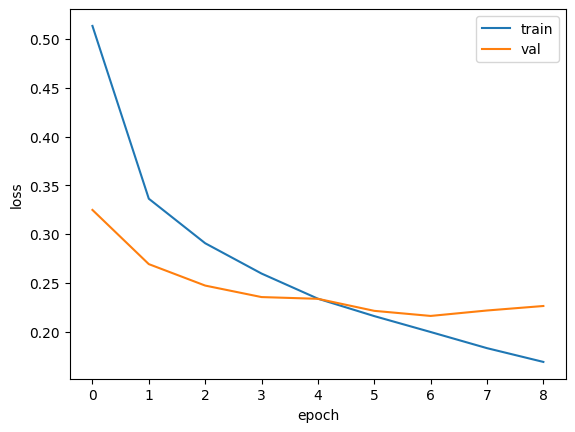

In [11]:

import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 7s 19ms/step - loss: 0.2161 - accuracy: 0.9216


[0.216062992811203, 0.921583354473114]

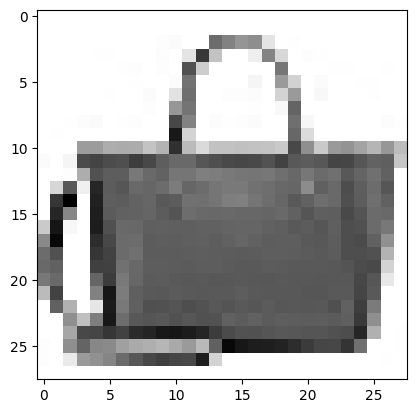

In [13]:

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:

preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 308ms/step
[[5.9427371e-14 1.5403468e-21 1.3867739e-16 1.4405218e-15 4.2606811e-14
  3.1747549e-17 7.1235454e-15 1.1604363e-15 1.0000000e+00 7.0403250e-19]]


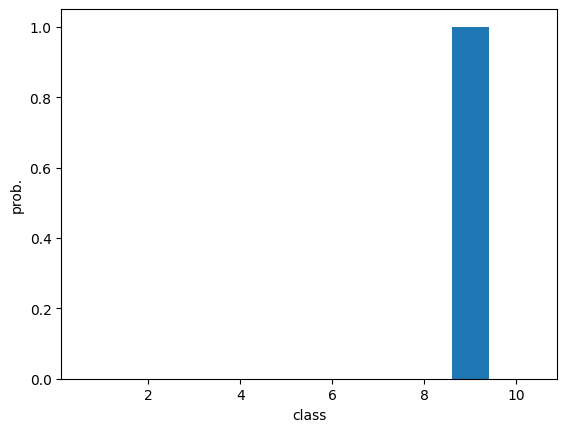

In [15]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
import numpy as np

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 6s 17ms/step - loss: 0.2339 - accuracy: 0.9148


[0.23394323885440826, 0.9147999882698059]